1.請選取['PTRATIO', 'B', 'LSTAT']欄位來進行多元線性迴歸，並輸出殘差值和 R 平
方
2.請選取['RM']欄位來進行多元線性迴歸，而且要做 log 轉換，再輸出殘差值和
R 平方。再對照前一章的結果。

In [ ]:
!pip install scikit-learn==1.1.3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['DFKai-sb']
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_boston
boston = load_boston()
df = pd.DataFrame(data = boston['data'], columns = boston['feature_names'])
df['target'] = boston['target']
df.head()

#1.請選取['PTRATIO', 'B', 'LSTAT']欄位來進行多元線性迴歸，並輸出殘差值和 R 平 方
X = df[['PTRATIO', 'B', 'LSTAT']]
y = df['target']

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print('Mean Squred Error:',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squred Error: 32.31745512355715
Mean Absolute Error: 4.150221892175866
R2 Score: 0.5729638992817327


原始的 RM 欄位:
Mean Squred Error: 39.091051114869956
Mean Absolute Error: 4.271512885857222
R2 Score: 0.4834590168919487
經過 log 轉換:
Mean Squred Error: 43.315599693479086
Mean Absolute Error: 4.466298530595191
R2 Score: 0.42763671450437224


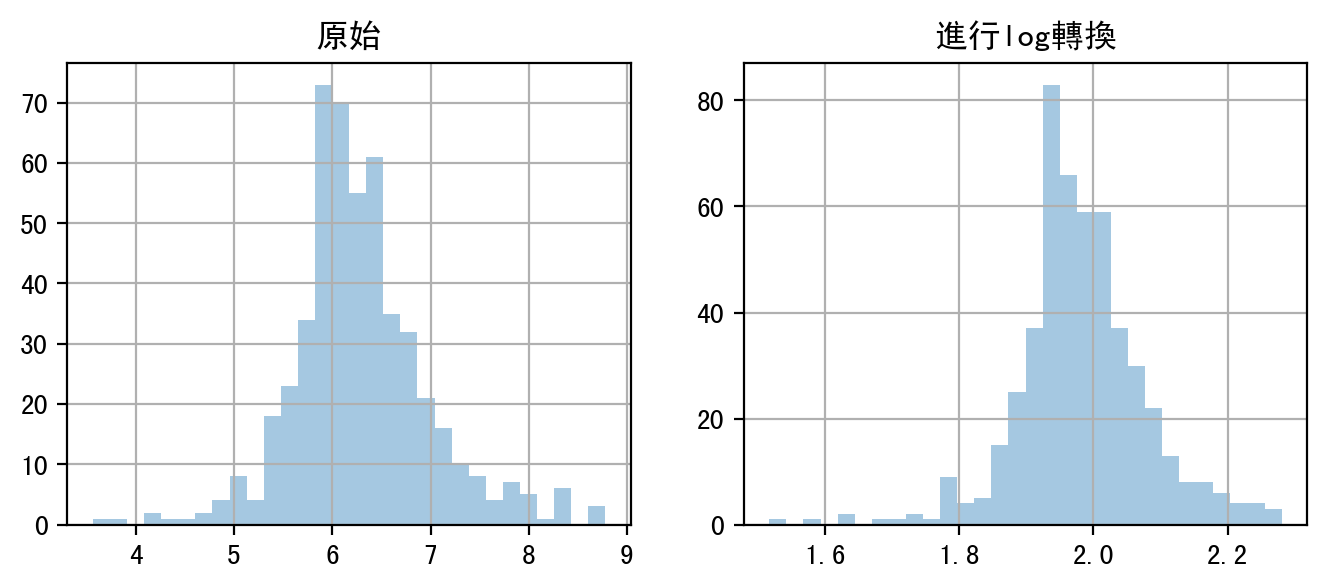

In [ ]:
#2.請選取['RM']欄位來進行多元線性迴歸，而且要做 log 轉換，再輸出殘差值和 R 平方。再對照前一章的結果。
X = df[['RM']]  # Log transformation
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('原始的 RM 欄位:')
print('Mean Squred Error:',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
data_pl = ColumnTransformer([
    ('column_sel','passthrough',['RM'])
])

model_pl = make_pipeline(data_pl,FunctionTransformer(np.log1p),LinearRegression())
model_pl.fit(X_train, y_train)
y_pred = model_pl.predict(X_test)

print('經過 log 轉換:')
print('Mean Squred Error:',mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

fig, axes = plt.subplots(1, 2, figsize=(8,3))
df['RM'].hist(alpha=0.4, bins=30, ax=axes[0])
axes[0].set_title('原始')
# 對'LSTAT'欄位進行log轉換
np.log1p(df['RM']).hist(alpha=0.4, bins=30, ax=axes[1])
axes[1].set_title('進行log轉換');

原始圖比較好，因為更接近常態分布。以數值來說Mean Squred Error 和Mean Absolute Error 這兩個指標反映了模型預測值與實際觀測值之間的差異程度，誤差越小表示模型的預測能力越好。R2 Score用來衡量模型對目標變量變異性的解釋程度。越接近 1，表示模型越能解釋目標變量的變異性；越接近 0 則表示模型的解釋能力較差。因此原始圖比較好

In [ ]:
# 中文處理
import matplotlib as mpl
import matplotlib.font_manager as fm

!wget "https://www.wfonts.com/download/data/2014/06/01/simhei/simhei.zip"
!unzip "simhei.zip"
!rm "simhei.zip"

fm.fontManager.addfont('SimHei.ttf')
mpl.rc('font', family='SimHei')
# 這一行能讓字體變得清晰
%config InlineBackend.figure_format = 'retina'

--2024-04-22 14:40:53--  https://www.wfonts.com/download/data/2014/06/01/simhei/simhei.zip
Resolving www.wfonts.com (www.wfonts.com)... 188.114.97.0, 188.114.96.0, 2a06:98c1:3121::, ...
Connecting to www.wfonts.com (www.wfonts.com)|188.114.97.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10546298 (10M) [application/octetstream]
Saving to: ‘simhei.zip’

simhei.zip          100%[===================>]  10.06M  62.8MB/s    in 0.2s    

2024-04-22 14:40:53 (62.8 MB/s) - ‘simhei.zip’ saved [10546298/10546298]

Archive:  simhei.zip
replace chinese.simhei.ttf? [y]es, [n]o, [A]ll, [N]one, [r]ename: 